# 1. Import packages and define functions

In [1]:

import h5py
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import os
from qutip import*
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap as lsc
import time
from matplotlib.pyplot import figure, show
from matplotlib import gridspec

# Everything in plae to be able to manipulate it quickly here if  needed.


N = 40
## cavity operators
a = tensor(destroy(N), qeye(2))
## qubit operator 
def char_func_grid(state, xvec):
    """Calculate the Characteristic function as a 2Dgrid (xvec, xvec) for a given state.

    Args:
        state (Qobject): State of which we want to calc the charfunc
        xvec (_type_): array of displacements. The char func will be calculated for the grid (xvec, xvec)

    Returns:
        tuple(ndarray, ndarray): Re(char func), Im(char func)
    """
    cfReal = np.empty((len(xvec),len(xvec)))
    cfImag = np.empty((len(xvec),len(xvec)))

    for i, alpha_x in enumerate(xvec):
        for j, alpha_p in enumerate(xvec):
            expect_value = expect(displace(N, alpha_x +1j*alpha_p),state)
            cfReal[i,j] =  np.real(expect_value)
            cfImag[i,j] =  np.imag(expect_value)

    return cfReal,cfImag  

def calc_squeez_parameter(dB):
    return np.log(10**(dB/10))/2

def twoD_Gaussian(xy_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    (x,y) = xy_tuple
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

# Cat

## Load and Plot Data

In [2]:
fps = []
d = "C:/Users/jonat/Desktop/Coding/tcsim/Data Analysis/Data/13102022/"
# files = [f for f in os.listdir(d) if f.endswith('panther_Cat_postselection.h5')]
fp = [d + f for f in os.listdir(d) if f.endswith('cat_decay.h5')]

fps = np.concatenate([fp[:]])

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/jonat/Desktop/Coding/tcsim/Data Analysis/Data/13102022/'

In [179]:
dg = []
de = []
dts = []

if 1:
    for kk in range(len(fps)):
#         fname = d + files[kk]
        df = h5py.File(fps[kk], "r")
        data = df["data"]
        data_i = data["I"][:]
        x = data["x"][:, 0, 0]
        y = data["y"][0, :, 0]
        dt = df.attrs['decay_time']
        thresh = -6.687025253601604e-06
#         ss_data = np.where(data_i < thresh, 1, 0)
#         thresh_1 = 6.30337300715842e-05
        raw_m0 = data_i[:, 0::3]
        raw_m1 = data_i[:, 1::3] 
        raw_m2 = data_i[:, 2::3]
        
        m0 = np.where(raw_m0 < thresh, 1, 0)
        m1 = np.where(raw_m1 < thresh, 1, 0)
        m2 = np.where(raw_m2 < thresh, 1, 0)
        
#         ss_data = np.where(data_i < thresh, 1, 0)
#         m0 = ss_data[:, 0::3]
#         m1 = ss_data[:, 1::3] 
#         m2 = ss_data[:, 2::3]
        m1_g = ma.masked_array(m1, mask=m0)
        m2_g = ma.masked_array(m2, mask=m0)

        ## only care about last two measurements
        proj_g = ma.masked_array(m2, mask=m1).mean(axis=0).reshape(len(x), len(y)) * 2 - 1
        proj_e = ma.masked_array(m2, mask=np.logical_not(m1)).mean(axis=0).reshape(len(x), len(y)) * 2 - 1

        ## condition on the first measurement as well
        double_ps_g = ma.masked_array(m2_g, mask=m1_g).mean(axis=0).reshape(len(x), len(y)) * 2 - 1
        double_ps_e = ma.masked_array(m2_g, mask=np.logical_not(m1_g)).mean(axis=0).reshape(len(x), len(y)) * 2 - 1

        dg.append(double_ps_g)
        de.append(double_ps_e)
        dts.append(dt)
dg = np.array(dg)
de = np.array(de)
dts = np.array(dts)
decay_times = np.unique(dts)
dd = {}

86


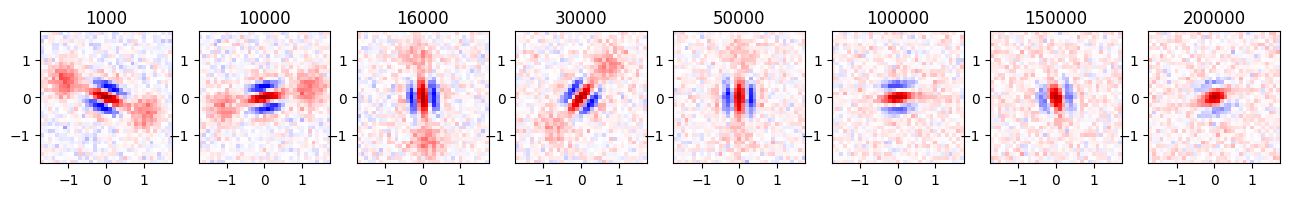

In [183]:
dg = []
de = []
dts = []
if 1:
    for kk in range(len(fps)):
#         fname = d + files[kk]
        df = h5py.File(fps[kk], "r")
        data = df["data"]
        data_i = data["I"][:]
        x = data["x"][:, 0, 0]
        y = data["y"][0, :, 0]
        dt = df.attrs['decay_time']
        thresh = -6.687025253601604e-06
#         ss_data = np.where(data_i < thresh, 1, 0)
#         thresh_1 = 6.30337300715842e-05
        raw_m0 = data_i[:, 0::3]
        raw_m1 = data_i[:, 1::3] 
        raw_m2 = data_i[:, 2::3]
        
        m0 = np.where(raw_m0 < thresh, 1, 0)
        m1 = np.where(raw_m1 < thresh, 1, 0)
        m2 = np.where(raw_m2 < thresh, 1, 0)
        
#         ss_data = np.where(data_i < thresh, 1, 0)
#         m0 = ss_data[:, 0::3]
#         m1 = ss_data[:, 1::3] 
#         m2 = ss_data[:, 2::3]
        m1_g = ma.masked_array(m1, mask=m0)
        m2_g = ma.masked_array(m2, mask=m0)

        ## only care about last two measurements
        proj_g = ma.masked_array(m2, mask=m1).mean(axis=0).reshape(len(x), len(y)) * 2 - 1
        proj_e = ma.masked_array(m2, mask=np.logical_not(m1)).mean(axis=0).reshape(len(x), len(y)) * 2 - 1

        ## condition on the first measurement as well
        double_ps_g = ma.masked_array(m2_g, mask=m1_g).mean(axis=0).reshape(len(x), len(y)) * 2 - 1
        double_ps_e = ma.masked_array(m2_g, mask=np.logical_not(m1_g)).mean(axis=0).reshape(len(x), len(y)) * 2 - 1

        dg.append(double_ps_g)
        de.append(double_ps_e)
        dts.append(dt)

dg = np.array(dg)
de = np.array(de)
dts = np.array(dts)
decay_times = np.unique(dts)
dd = {}
for n in range(len(decay_times)):
    dd[str(decay_times[n])] = []

for n, dt in enumerate(dts):
    dd[str(dt)].append(dg[n])
    
d_avg = {}
for n, dt in enumerate(dts): 
    
    d_avg[str(dt)] = np.array(dd[str(dt)]).mean(axis=0)
print(len(dts))

import math

rows = 1
cols = len(decay_times)

fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
# for i in range(rows):
for j in range(cols):
    axes[j].pcolormesh(x, x, d_avg[str(decay_times[j])][:, :], cmap="seismic", shading = 'auto', vmax=1, vmin=-1)
    axes[j].set_aspect("equal")
    axes[j].set_title(str(decay_times[j]))
#         l += 1      
plt.show()
cols = 4
rows = math.ceil(len(dg) / cols)
data_array = [d_avg[str(time)] for time in decay_times]


## Fit a blob to extract displacement and check that blob is not squeezed

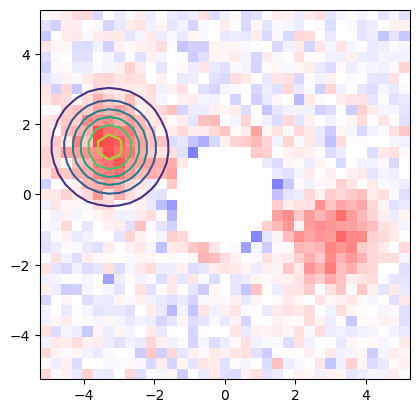

In [184]:
# finding alpha of the cat by fitting a gaussian to one of the blobs
""" 
Use the above plot to make good intial guesses!
Sometimes, fitting to e.g. the proj_e projection might work better.

"""
scaling = 3


xvec = x*scaling # i define it like this in case i want to slice x
yvec = x*scaling
X, Y = np.meshgrid(yvec, xvec)

data = d_avg[str(decay_times[0])]

mask=np.zeros(np.shape(data))
mask[:,:] = 1
mask[np.abs(X**2+Y**2)<1.5**2]=0
data = data*mask
maxi=np.unravel_index(np.argmax(data, axis=None), data.shape)
x0=X[maxi]
y0=Y[maxi]

initial_guess = (0.3, x0,y0, 0.5, 0.5, 0, 0) # upper blob

    
popt1, pcov1 = opt.curve_fit(twoD_Gaussian, (X, Y), data.flatten(), p0=initial_guess)



data_fitted1 = twoD_Gaussian((X, Y), *popt1)

fig, ax = plt.subplots(1, 1)

ax.pcolormesh(X,Y, data, cmap="seismic", vmin = -1 , vmax = 1)
ax.contour(yvec,xvec, data_fitted1.reshape(len(x),len(y)))
ax.set_aspect("equal")
plt.show()

In [185]:
print("First Blob")
print('xcenter:',popt1[1])
print('ycenter:',popt1[2])
print('|distance from origin| =',np.sqrt(popt1[1]**2+popt1[2]**2))
print("sigmax:",(popt1[4]))
print("sigmay:",(popt1[3]))
print("sigma ratio:",(popt1[3]/popt1[4]))
print("squeezing in db x:",-20*np.log10((np.abs(popt1[4]*1.2))))
print("squeezing in db y:",-20*np.log10((np.abs(popt1[3]*1.2))))
print('angle in degree:', np.rad2deg(popt1[5]))

First Blob
xcenter: -3.264898604923306
ycenter: 1.3467784723771015
|distance from origin| = 3.5317665769538835
sigmax: 0.8253979811762888
sigmay: 0.8444871609053687
sigma ratio: 1.0231272430565865
squeezing in db x: 0.08310703282992984
squeezing in db y: -0.1154859448517783
angle in degree: 70.74896745756408


## Extracting Blob Contrast over time

### Cat

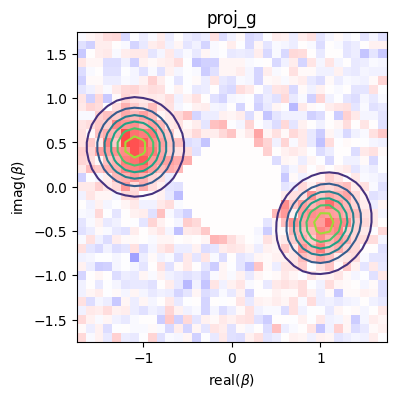

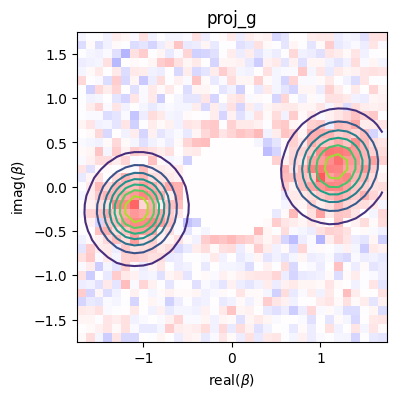

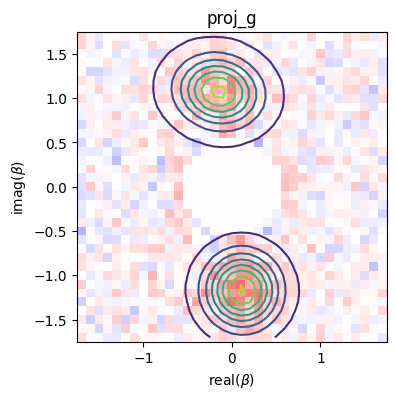

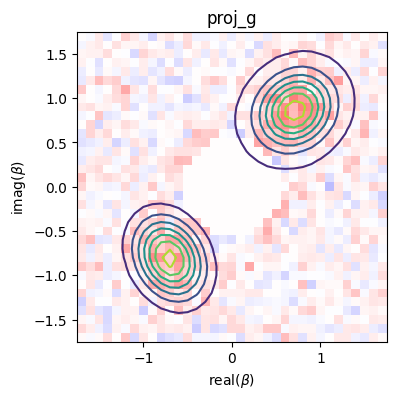

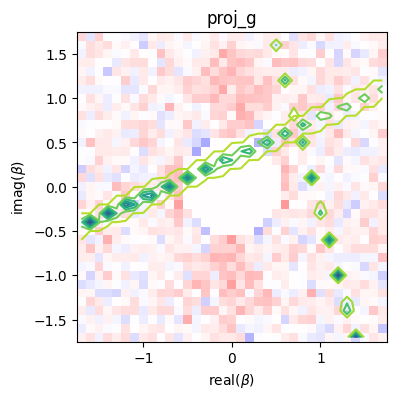

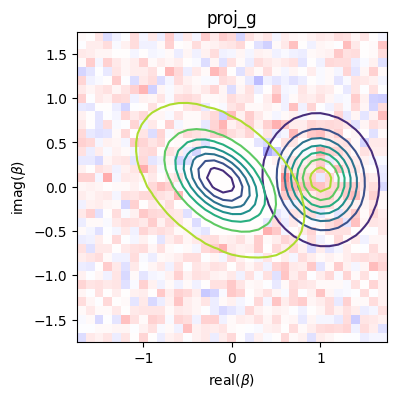

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1600.

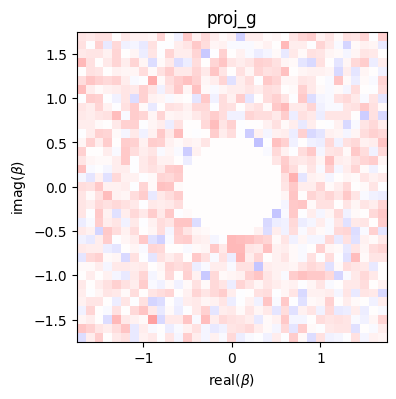

In [186]:
amp_cat = []
for data in data_array:
    fig, ax = plt.subplots(figsize=(4, 6))
    mask=np.zeros(np.shape(data))
    mask[:,:]=1
    X, Y = np.meshgrid(x,x)
    mask[np.abs(X**2+Y**2)<0.3]=0
    data = data*mask
    ax.pcolormesh(x,x, data, cmap="seismic", vmax=1, vmin=-1)
    ax.set_aspect("equal")
    ax.set_xlabel(r"real($\beta$)")
    ax.set_ylabel(r"imag($\beta$)")
    ax.set_title('proj_g')
   
    
    maxi=np.unravel_index(np.argmax(data, axis=None), data.shape)
    x0=X[maxi]
    y0=Y[maxi]
    initial_guess1 = (0.3, x0,y0, 0.5, 0.5, 0, 0) # upper blob
    initial_guess2 = (0.3, -x0,-y0, 0.5, 0.5, 0, 0) # lower blob
    

    # data = mx_g.data[:][:]
   
  
    popt1, pcov1 = opt.curve_fit(twoD_Gaussian, (X, Y), data.flatten(), p0=initial_guess1)

    popt2, pcov2 = opt.curve_fit(twoD_Gaussian, (X, Y), data.flatten(), p0=initial_guess2)
    amp_cat.append((popt1[0]+popt2[0])/2)

    data_fitted1 = twoD_Gaussian((X, Y), *popt1)
    data_fitted2 = twoD_Gaussian((X, Y), *popt2)

    ax.contour(X,Y, data_fitted1.reshape(len(x),len(x)))
    ax.contour(X,Y, data_fitted2.reshape(len(x),len(x)))
    plt.show()


In [187]:
amp_cat

[0.29150658603198876,
 0.24027746983670423,
 0.19864199907057062,
 0.178195377049699,
 -0.1987062807529527,
 0.007988938794362608]

# 3dB Squeezed

## Load and Plot Data

78


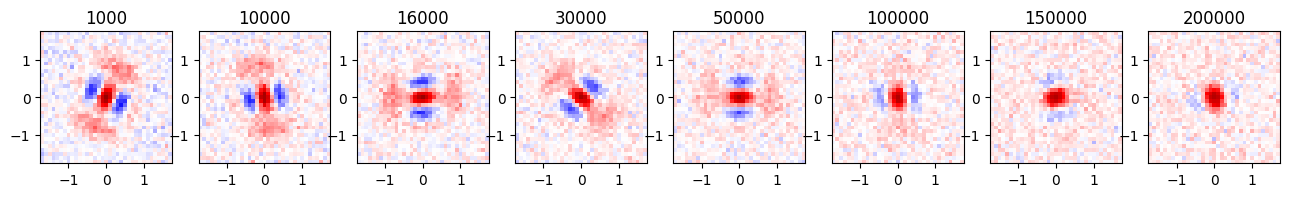

In [198]:
fps = []
d = "C:/Users/jonat/Desktop/Coding/tcsim/Data Analysis/Data/13102022/"
# files = [f for f in os.listdir(d) if f.endswith('panther_Cat_postselection.h5')]
fp = [d + f for f in os.listdir(d) if f.endswith('vcat_3db.h5')]

fps = np.concatenate([fp[:-8]])


dg = []
de = []
dts = []
if 1:
    for kk in range(len(fps)):
#         fname = d + files[kk]
        df = h5py.File(fps[kk], "r")
        data = df["data"]
        data_i = data["I"][:]
        x = data["x"][:, 0, 0]
        y = data["y"][0, :, 0]
        dt = df.attrs['decay_time']
        thresh = -6.687025253601604e-06
#         ss_data = np.where(data_i < thresh, 1, 0)
#         thresh_1 = 6.30337300715842e-05
        raw_m0 = data_i[:, 0::3]
        raw_m1 = data_i[:, 1::3] 
        raw_m2 = data_i[:, 2::3]
        
        m0 = np.where(raw_m0 < thresh, 1, 0)
        m1 = np.where(raw_m1 < thresh, 1, 0)
        m2 = np.where(raw_m2 < thresh, 1, 0)
        
#         ss_data = np.where(data_i < thresh, 1, 0)
#         m0 = ss_data[:, 0::3]
#         m1 = ss_data[:, 1::3] 
#         m2 = ss_data[:, 2::3]
        m1_g = ma.masked_array(m1, mask=m0)
        m2_g = ma.masked_array(m2, mask=m0)

        ## only care about last two measurements
        proj_g = ma.masked_array(m2, mask=m1).mean(axis=0).reshape(len(x), len(y)) * 2 - 1
        proj_e = ma.masked_array(m2, mask=np.logical_not(m1)).mean(axis=0).reshape(len(x), len(y)) * 2 - 1

        ## condition on the first measurement as well
        double_ps_g = ma.masked_array(m2_g, mask=m1_g).mean(axis=0).reshape(len(x), len(y)) * 2 - 1
        double_ps_e = ma.masked_array(m2_g, mask=np.logical_not(m1_g)).mean(axis=0).reshape(len(x), len(y)) * 2 - 1

        dg.append(double_ps_g)
        de.append(double_ps_e)
        dts.append(dt)

dg = np.array(dg)
de = np.array(de)
dts = np.array(dts)
decay_times = np.unique(dts)
dd = {}
for n in range(len(decay_times)):
    dd[str(decay_times[n])] = []

for n, dt in enumerate(dts):
    dd[str(dt)].append(dg[n])
    
d_avg = {}
for n, dt in enumerate(dts): 
    
    d_avg[str(dt)] = np.array(dd[str(dt)]).mean(axis=0)
print(len(dts))

import math

rows = 1
cols = len(decay_times)

fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
# for i in range(rows):
for j in range(cols):
    axes[j].pcolormesh(x, x, d_avg[str(decay_times[j])][:, :], cmap="seismic", shading = 'auto', vmax=1, vmin=-1)
    axes[j].set_aspect("equal")
    axes[j].set_title(str(decay_times[j]))
#         l += 1      
plt.show()
cols = 4
rows = math.ceil(len(dg) / cols)
data_array = [d_avg[str(time)] for time in decay_times]



## Fit a blob to extract displacement and squeezing

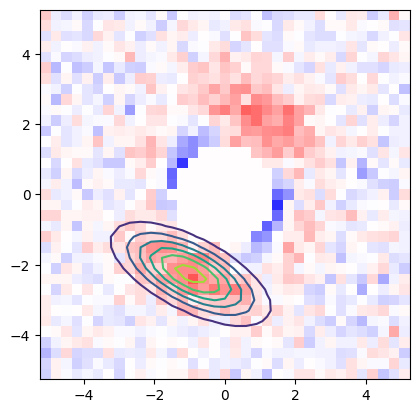

In [199]:
# finding alpha of the cat by fitting a gaussian to one of the blobs
""" 
Use the above plot to make good intial guesses!
Sometimes, fitting to e.g. the proj_e projection might work better.

"""
scaling = 3


xvec = x*scaling # i define it like this in case i want to slice x
yvec = x*scaling
X, Y = np.meshgrid(yvec, xvec)

data = d_avg[str(decay_times[0])]

mask=np.zeros(np.shape(data))
mask[:,:] = 1
mask[np.abs(X**2+Y**2)<1.5**2]=0
data = data*mask
maxi=np.unravel_index(np.argmax(data, axis=None), data.shape)
x0=X[maxi]
y0=Y[maxi]

initial_guess = (0.3, x0,y0, 0.5, 0.5, 0, 0) # upper blob

    
popt1, pcov1 = opt.curve_fit(twoD_Gaussian, (X, Y), data.flatten(), p0=initial_guess)



data_fitted1 = twoD_Gaussian((X, Y), *popt1)

fig, ax = plt.subplots(1, 1)

ax.pcolormesh(X,Y, data, cmap="seismic", vmin = -1 , vmax = 1)
ax.contour(yvec,xvec, data_fitted1.reshape(len(x),len(y)))
ax.set_aspect("equal")
plt.show()

In [200]:
print("First Blob")
print('xcenter:',popt1[1])
print('ycenter:',popt1[2])
print('|distance from origin| =',np.sqrt(popt1[1]**2+popt1[2]**2))
print("sigmax:",(popt1[4]))
print("sigmay:",(popt1[3]))
print("sigma ratio:",(popt1[3]/popt1[4]))
print("squeezing in db x:",-20*np.log10((np.abs(popt1[4]*1.2))))
print("squeezing in db y:",-20*np.log10((np.abs(popt1[3]*1.2))))
print('angle in degree:', np.rad2deg(popt1[5]))

First Blob
xcenter: -0.9724767172289386
ycenter: -2.2588577953394875
|distance from origin| = 2.4592985799041043
sigmax: 0.5260016083264446
sigmay: 1.2931916124583147
sigma ratio: 2.4585316698418542
squeezing in db x: 3.996633637560854
squeezing in db y: -3.816882503911074
angle in degree: 27.355565066087344


## Extracting Blob Contrast over time

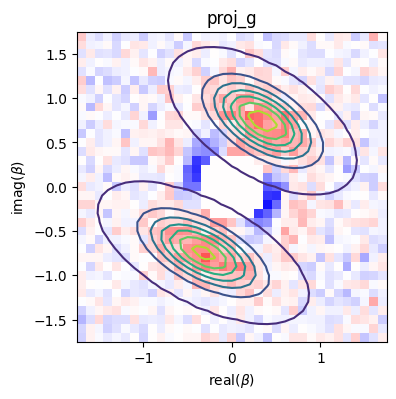

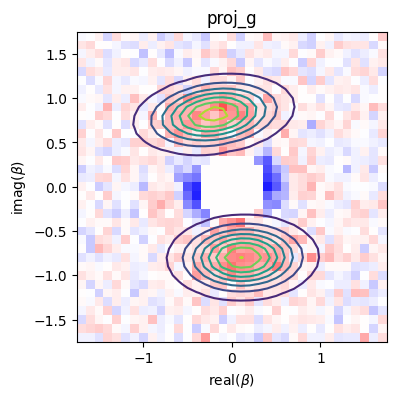

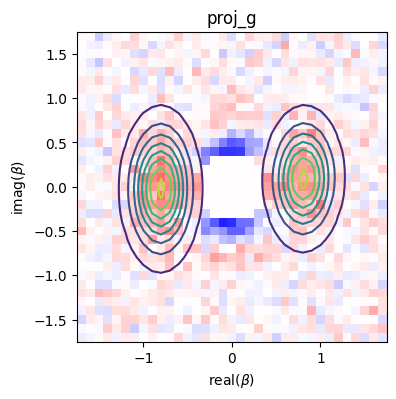

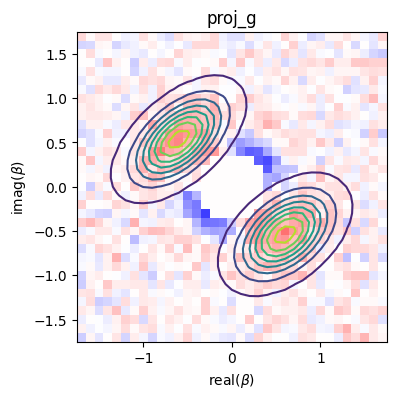

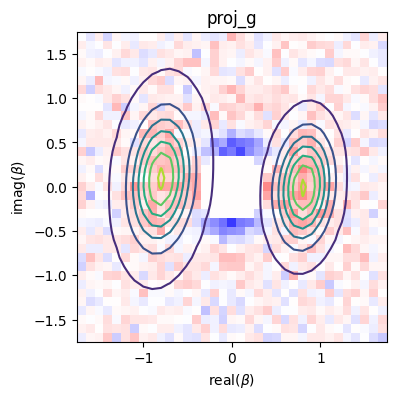

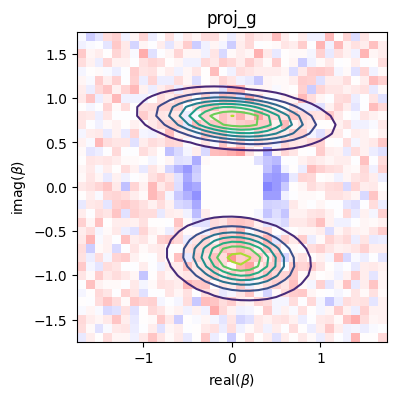

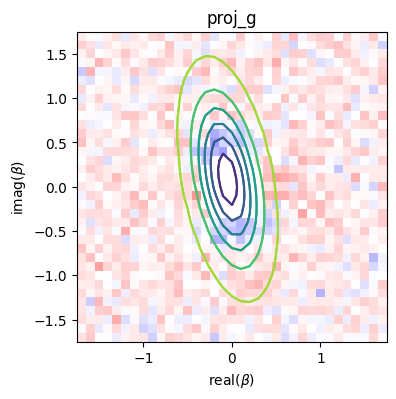

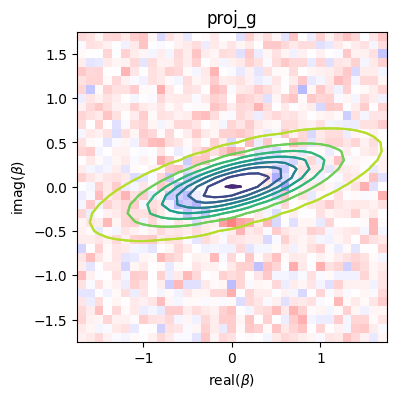

In [201]:
data_array= [d_avg[str(time)][:, :] for time in decay_times]
amp_cat_3db = []
for data in data_array:
    fig, ax = plt.subplots(figsize=(4, 6))
    mask=np.zeros(np.shape(data))
    mask[:,:]=1
    X, Y = np.meshgrid(x,x)
    mask[np.abs(X**2+Y**2)<0.15]=0
    data = data*mask
    ax.pcolormesh(x,x, data, cmap="seismic", vmax=1, vmin=-1)
    ax.set_aspect("equal")
    ax.set_xlabel(r"real($\beta$)")
    ax.set_ylabel(r"imag($\beta$)")
    ax.set_title('proj_g')
   
    
    maxi=np.unravel_index(np.argmax(data, axis=None), data.shape)
    x0=X[maxi]
    y0=Y[maxi]
    initial_guess1 = (0.3, x0,y0, 0.5, 0.5, 0, 0) # upper blob
    initial_guess2 = (0.3, -x0,-y0, 0.5, 0.5, 0, 0) # lower blob
    

    # data = mx_g.data[:][:]
   
  
    popt1, pcov1 = opt.curve_fit(twoD_Gaussian, (X, Y), data.flatten(), p0=initial_guess1)

    popt2, pcov2 = opt.curve_fit(twoD_Gaussian, (X, Y), data.flatten(), p0=initial_guess2)
    amp_cat_3db.append((popt1[0]+popt1[0])/2)

    data_fitted1 = twoD_Gaussian((X, Y), *popt1)
    data_fitted2 = twoD_Gaussian((X, Y), *popt2)

    ax.contour(X,Y, data_fitted1.reshape(len(x),len(x)))
    ax.contour(X,Y, data_fitted2.reshape(len(x),len(x)))
    plt.show()


# Squeezing 6dB

## Load and Plot Data

78


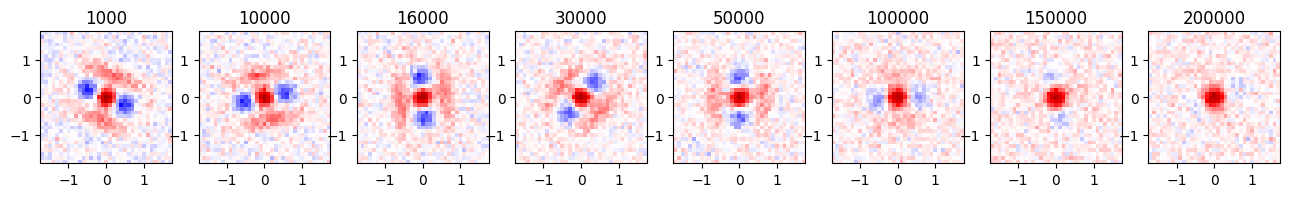

In [204]:
fps = []
d = "C:/Users/jonat/Desktop/Coding/tcsim/Data Analysis/Data/13102022/"
# files = [f for f in os.listdir(d) if f.endswith('panther_Cat_postselection.h5')]
fp = [d + f for f in os.listdir(d) if f.endswith('vcat_6db.h5')]

fps = np.concatenate([fp[:-8]])


dg = []
de = []
dts = []
if 1:
    for kk in range(len(fps)):
#         fname = d + files[kk]
        df = h5py.File(fps[kk], "r")
        data = df["data"]
        data_i = data["I"][:]
        x = data["x"][:, 0, 0]
        y = data["y"][0, :, 0]
        dt = df.attrs['decay_time']
        thresh = -6.687025253601604e-06
#         ss_data = np.where(data_i < thresh, 1, 0)
#         thresh_1 = 6.30337300715842e-05
        raw_m0 = data_i[:, 0::3]
        raw_m1 = data_i[:, 1::3] 
        raw_m2 = data_i[:, 2::3]
        
        m0 = np.where(raw_m0 < thresh, 1, 0)
        m1 = np.where(raw_m1 < thresh, 1, 0)
        m2 = np.where(raw_m2 < thresh, 1, 0)
        
#         ss_data = np.where(data_i < thresh, 1, 0)
#         m0 = ss_data[:, 0::3]
#         m1 = ss_data[:, 1::3] 
#         m2 = ss_data[:, 2::3]
        m1_g = ma.masked_array(m1, mask=m0)
        m2_g = ma.masked_array(m2, mask=m0)

        ## only care about last two measurements
        proj_g = ma.masked_array(m2, mask=m1).mean(axis=0).reshape(len(x), len(y)) * 2 - 1
        proj_e = ma.masked_array(m2, mask=np.logical_not(m1)).mean(axis=0).reshape(len(x), len(y)) * 2 - 1

        ## condition on the first measurement as well
        double_ps_g = ma.masked_array(m2_g, mask=m1_g).mean(axis=0).reshape(len(x), len(y)) * 2 - 1
        double_ps_e = ma.masked_array(m2_g, mask=np.logical_not(m1_g)).mean(axis=0).reshape(len(x), len(y)) * 2 - 1

        dg.append(double_ps_g)
        de.append(double_ps_e)
        dts.append(dt)

dg = np.array(dg)
de = np.array(de)
dts = np.array(dts)
decay_times = np.unique(dts)
dd = {}
for n in range(len(decay_times)):
    dd[str(decay_times[n])] = []

for n, dt in enumerate(dts):
    dd[str(dt)].append(dg[n])
    
d_avg = {}
for n, dt in enumerate(dts): 
    
    d_avg[str(dt)] = np.array(dd[str(dt)]).mean(axis=0)
print(len(dts))

import math

rows = 1
cols = len(decay_times)

fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
# for i in range(rows):
for j in range(cols):
    axes[j].pcolormesh(x, x, d_avg[str(decay_times[j])][:, :], cmap="seismic", shading = 'auto', vmax=1, vmin=-1)
    axes[j].set_aspect("equal")
    axes[j].set_title(str(decay_times[j]))
#         l += 1      
plt.show()
cols = 4
rows = math.ceil(len(dg) / cols)

data_array = [d_avg[str(time)] for time in decay_times]

## Fit a blob to extract displacement and squeezing

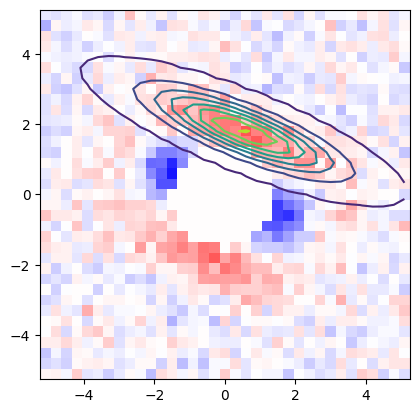

In [205]:
# finding alpha of the cat by fitting a gaussian to one of the blobs
""" 
Use the above plot to make good intial guesses!
Sometimes, fitting to e.g. the proj_e projection might work better.

"""
scaling = 3


xvec = x*scaling # i define it like this in case i want to slice x
yvec = x*scaling
X, Y = np.meshgrid(yvec, xvec)

data = d_avg[str(decay_times[0])]

mask=np.zeros(np.shape(data))
mask[:,:] = 1
mask[np.abs(X**2+Y**2)<1.5**2]=0
data = data*mask
maxi=np.unravel_index(np.argmax(data, axis=None), data.shape)
x0=X[maxi]
y0=Y[maxi]

initial_guess = (0.3, x0,y0, 0.5, 0.5, 0, 0) # upper blob

    
popt1, pcov1 = opt.curve_fit(twoD_Gaussian, (X, Y), data.flatten(), p0=initial_guess)



data_fitted1 = twoD_Gaussian((X, Y), *popt1)

fig, ax = plt.subplots(1, 1)

ax.pcolormesh(X,Y, data, cmap="seismic", vmin = -1 , vmax = 1)
ax.contour(yvec,xvec, data_fitted1.reshape(len(x),len(y)))
ax.set_aspect("equal")
plt.show()

In [206]:
print("First Blob")
print('xcenter:',popt1[1])
print('ycenter:',popt1[2])
print('|distance from origin| =',np.sqrt(popt1[1]**2+popt1[2]**2))
print("sigmax:",(popt1[4]))
print("sigmay:",(popt1[3]))
print("sigma ratio:",(popt1[3]/popt1[4]))
print("squeezing in db x:",-20*np.log10((np.abs(popt1[4]*1.2))))
print("squeezing in db y:",-20*np.log10((np.abs(popt1[3]*1.2))))
print('angle in degree:', np.rad2deg(popt1[5]))

First Blob
xcenter: 0.5481586362934032
ycenter: 1.7954727834106563
|distance from origin| = 1.8772853822771467
sigmax: 0.39950836850571
sigmay: 1.7493148204169058
sigma ratio: 4.378668779730214
squeezing in db x: 6.385857460726324
squeezing in db y: -6.440984432036416
angle in degree: 21.745950165161428


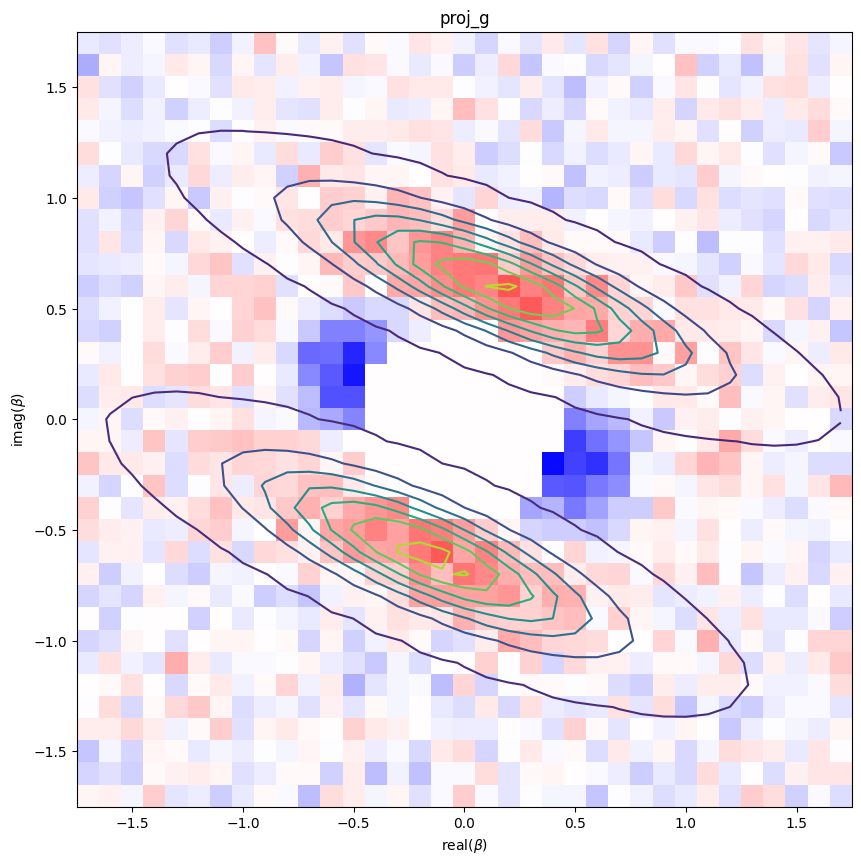

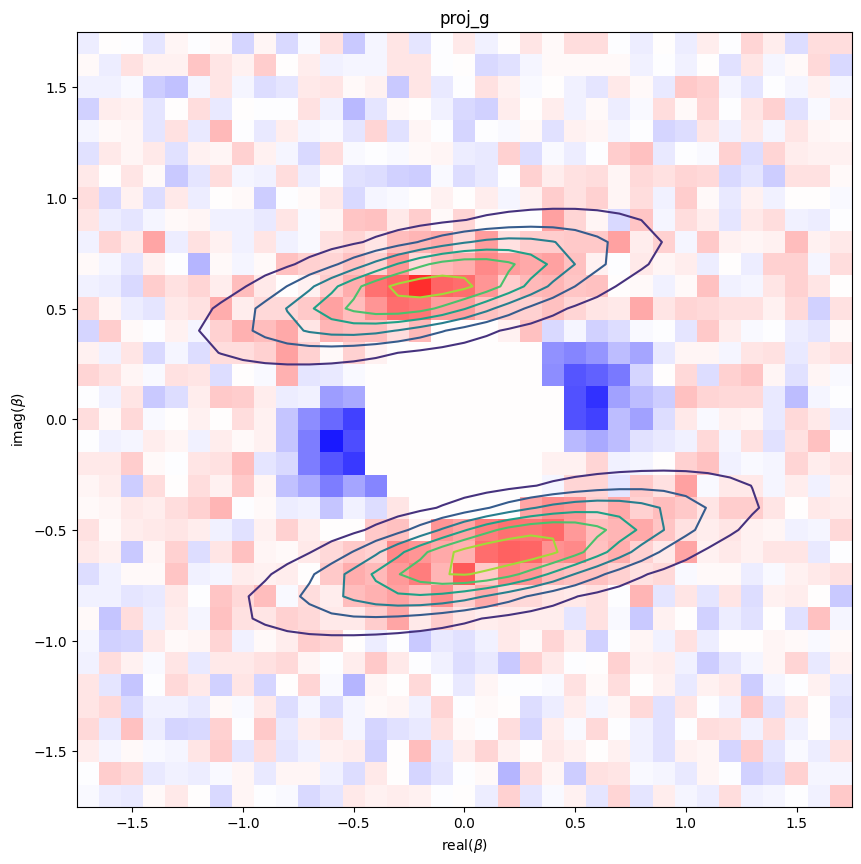

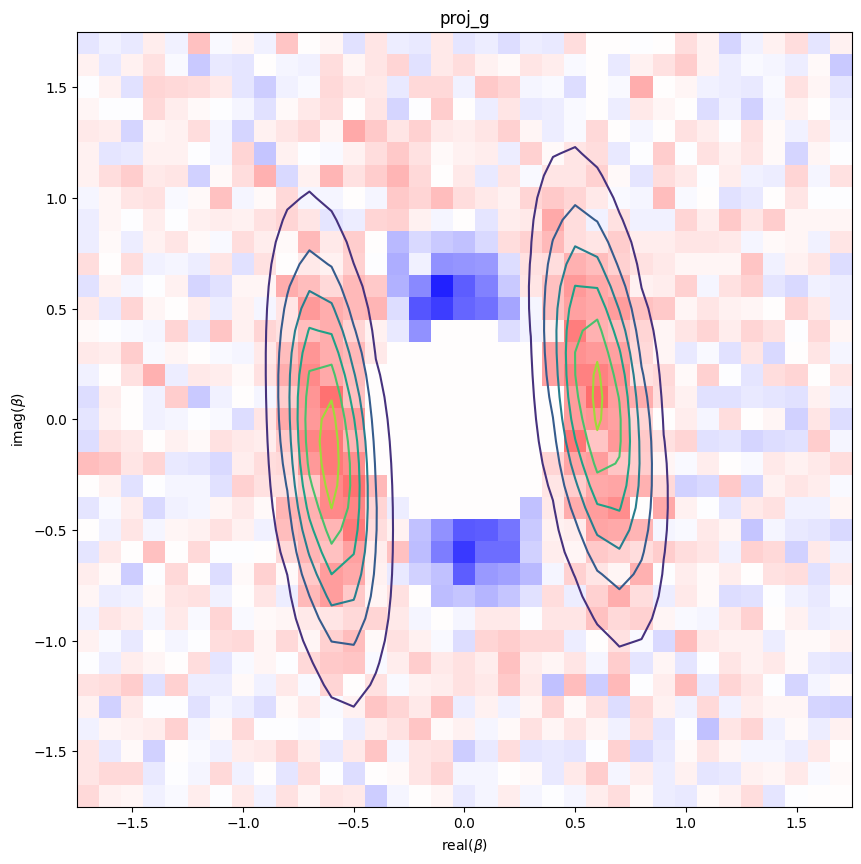

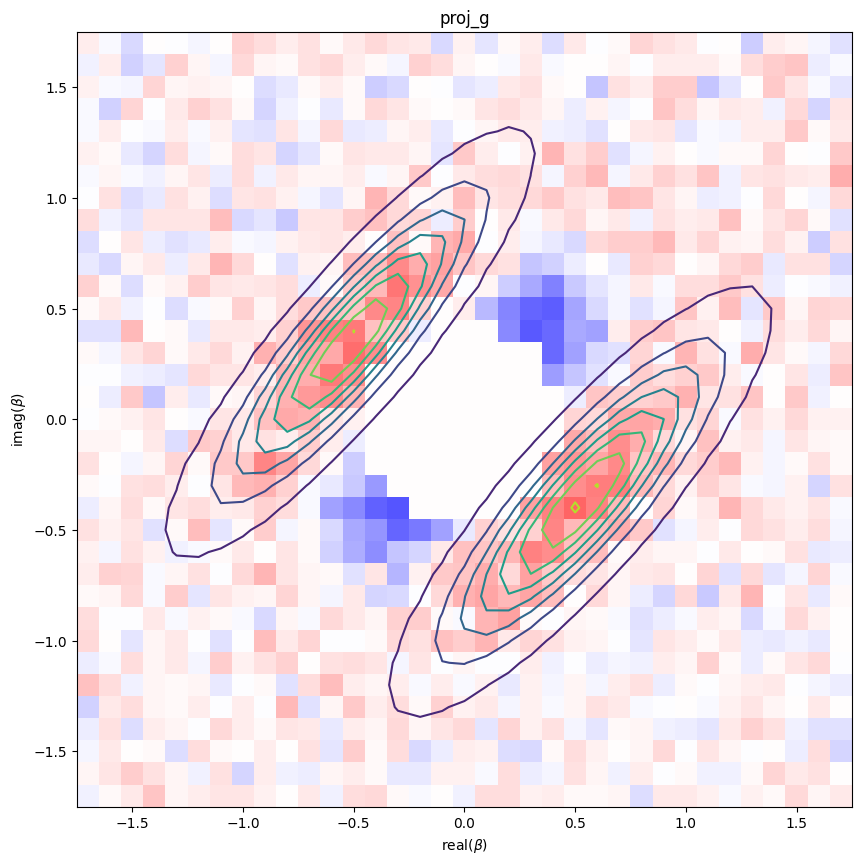

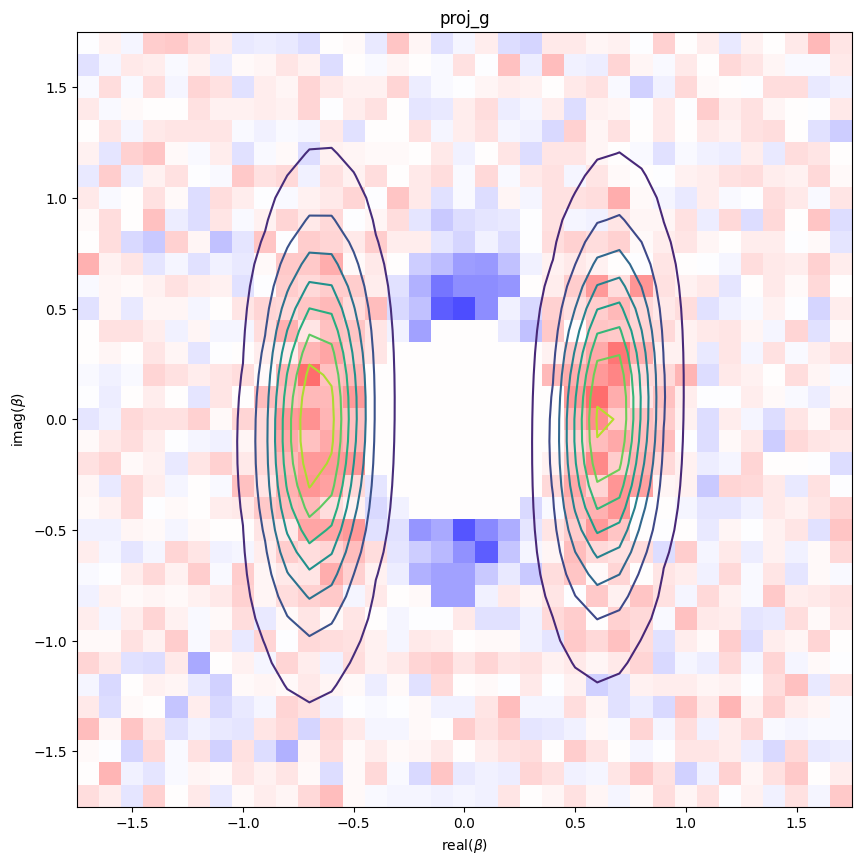

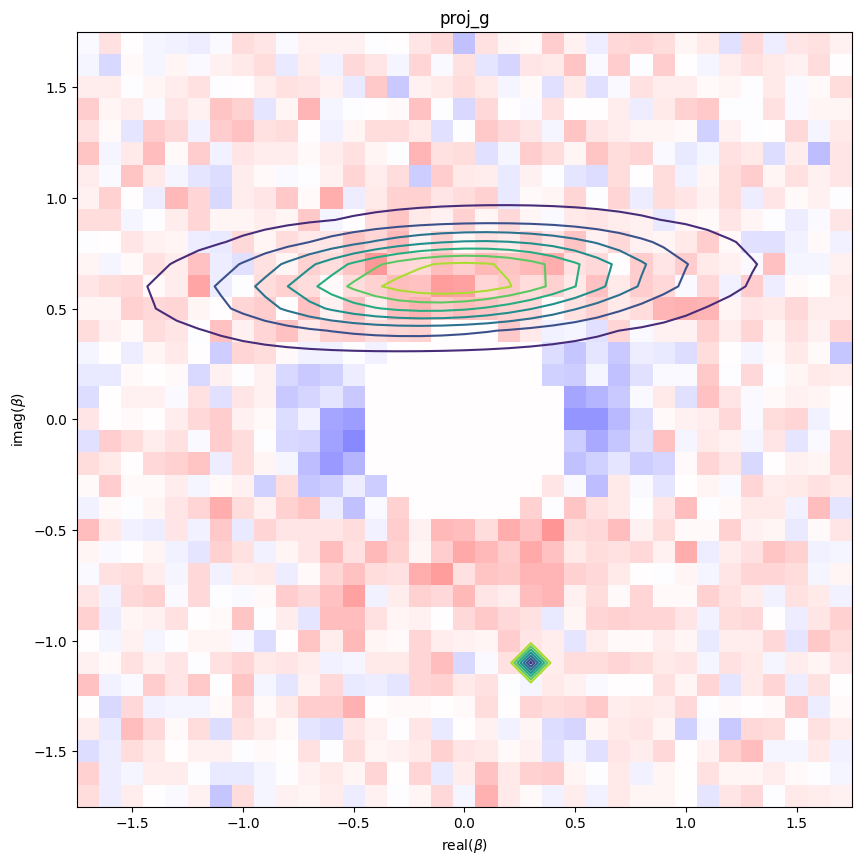

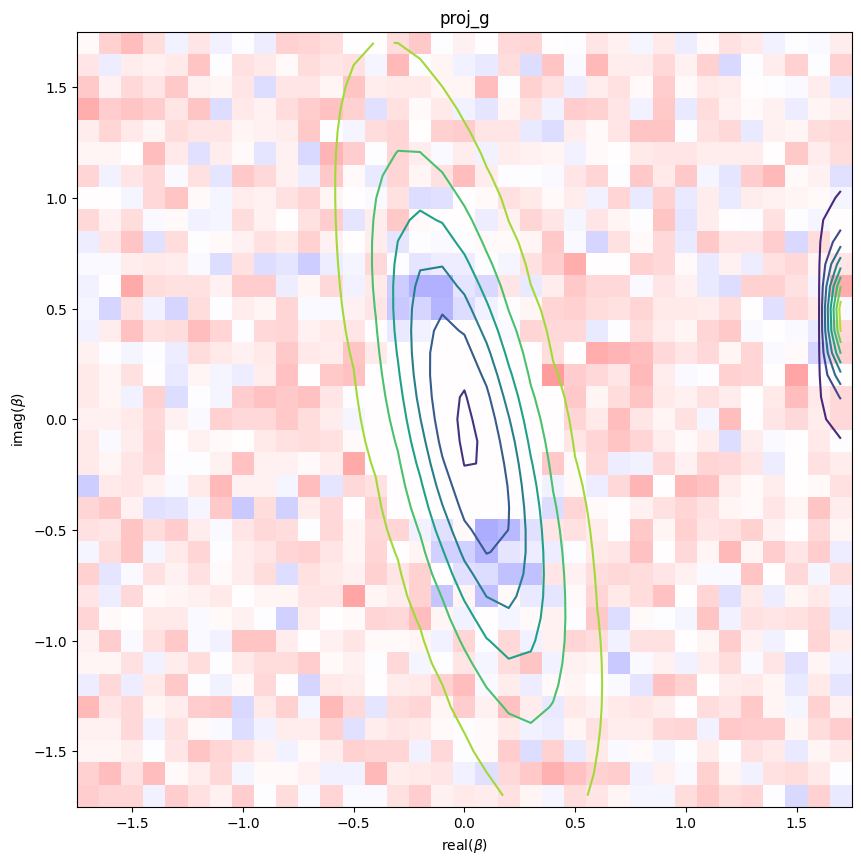

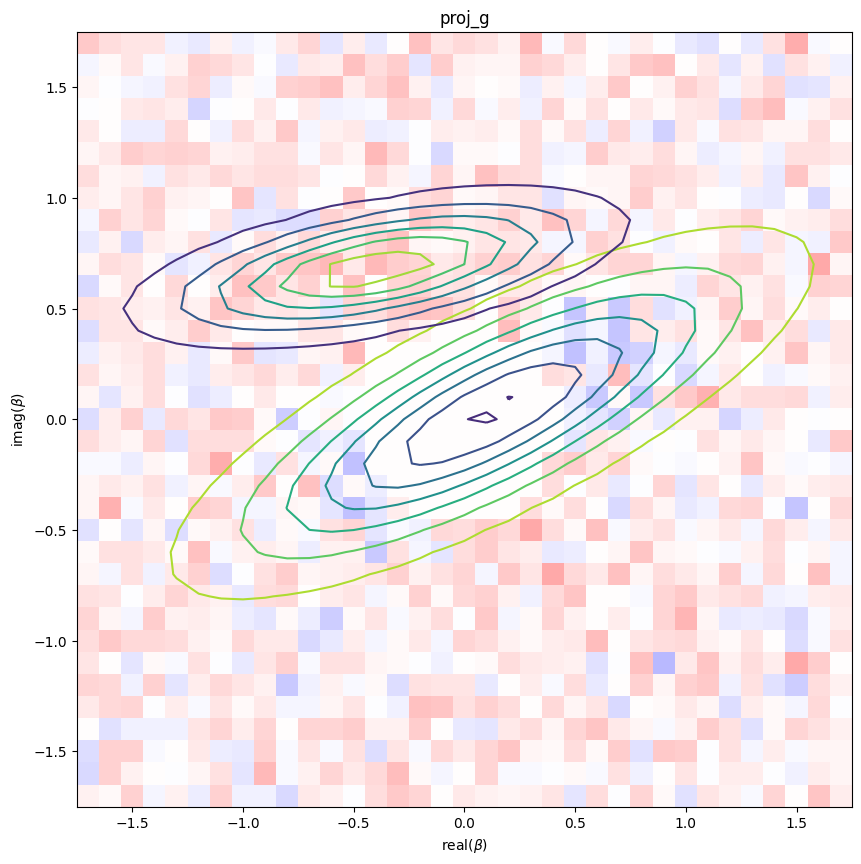

In [195]:
data_array= [d_avg[str(time)][:, :] for time in decay_times]
amp_cat_6db = []
for data in data_array:
    fig, ax = plt.subplots(figsize=(10, 20))
    mask=np.zeros(np.shape(data))
    mask[:,:]=1
    X, Y = np.meshgrid(x,x)
    mask[np.abs(X**2+Y**2)<0.2]=0
    data = data*mask
    ax.pcolormesh(x,x, data, cmap="seismic", vmax=1, vmin=-1)
    ax.set_aspect("equal")
    ax.set_xlabel(r"real($\beta$)")
    ax.set_ylabel(r"imag($\beta$)")
    ax.set_title('proj_g')
   
    
    maxi=np.unravel_index(np.argmax(data, axis=None), data.shape)
    x0=X[maxi]
    y0=Y[maxi]
    initial_guess1 = (0.3, x0,y0, 0.5, 0.5, 0, 0) # upper blob
    initial_guess2 = (0.3, -x0,-y0, 0.5, 0.5, 0, 0) # lower blob
    

    # data = mx_g.data[:][:]
   
  
    popt1, pcov1 = opt.curve_fit(twoD_Gaussian, (X, Y), data.flatten(), p0=initial_guess1)

    popt2, pcov2 = opt.curve_fit(twoD_Gaussian, (X, Y), data.flatten(), p0=initial_guess2)
    amp_cat_6db.append((popt1[0]+popt2[0])/2)

    data_fitted1 = twoD_Gaussian((X, Y), *popt1)
    data_fitted2 = twoD_Gaussian((X, Y), *popt2)

    ax.contour(X,Y, data_fitted1.reshape(len(x),len(x)))
    ax.contour(X,Y, data_fitted2.reshape(len(x),len(x)))
    plt.show()


# Plotting the blob amplitudes over time

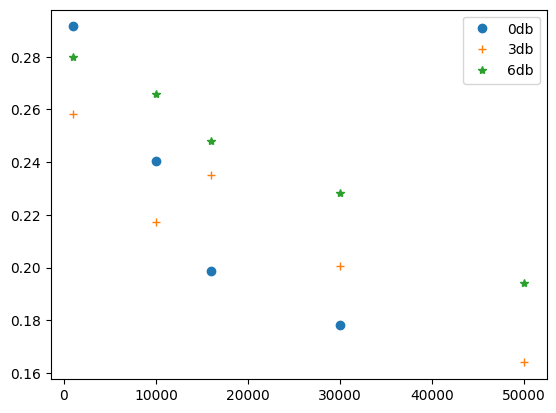

In [202]:
plt.plot(decay_times[:-4], amp_cat[:-2],'o',  label="0db")
plt.plot(decay_times[:-3], amp_cat_3db[:-3],"+", label="3db")
plt.plot(decay_times[:-3], amp_cat_6db[:-3], "*",   label="6db")
plt.legend()

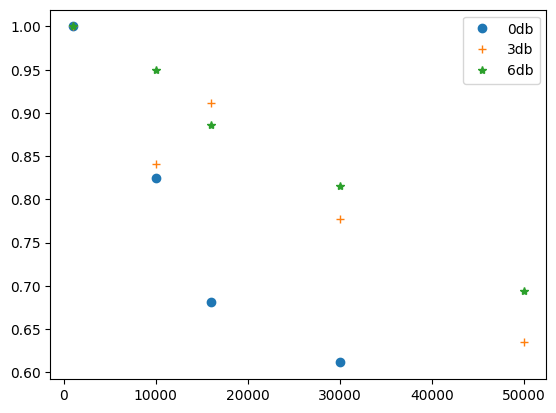

In [203]:
plt.plot(decay_times[:-4], amp_cat[:-2]/np.max(amp_cat),'o',  label="0db")
plt.plot(decay_times[:-3], amp_cat_3db[:-3]/np.max(amp_cat_3db),"+", label="3db")
plt.plot(decay_times[:-3], amp_cat_6db[:-3]/np.max(amp_cat_6db), "*",   label="6db")
plt.legend()

### Find out the squeezing and displacement at t=0 

# Generate theoretical Data

In [269]:
def char_func_grid(state, xvec):
    """Calculate the Characteristic function as a 2Dgrid (xvec, xvec) for a given state.

    Args:
        state (Qobject): State of which we want to calc the charfunc
        xvec (_type_): array of displacements. The char func will be calculated for the grid (xvec, xvec)

    Returns:
        tuple(ndarray, ndarray): Re(char func), Im(char func)
    """
    cfReal = np.empty((len(xvec),len(xvec)))
    cfImag = np.empty((len(xvec),len(xvec)))
    N = state.dims[0][1]

    for i, alpha_x in enumerate(xvec):
        for j, alpha_p in enumerate(xvec):
            expect_value = qt.expect(qt.displace(N, alpha_x +1j*alpha_p),qt.ptrace(state,1))
            cfReal[i,j] =  np.real(expect_value)
            cfImag[i,j] =  np.imag(expect_value)

    return cfReal,cfImag   

# System
N = 50

Iq = qeye(2)
Ic = qeye(N)
a = destroy(N)
n = a.dag()*a


def U_ideal_operator(u_k: float):
    P = (1j*(a.dag()-a))/2
    Uk = (1j*u_k*P*sx).expm()
    return Uk

vac = tensor(fock(2,0),fock(N,0))

# calculated 1D char func
def char_func_cut(state, xvec, axis = 1):
    """Calculate the Characteristic function as a 2Dgrid (xvec, xvec) for a given state.

    Args:
        state (Qobject): State of which we want to calc the charfunc
        xvec (_type_): array of displacements. The char func will be calculated for the grid (xvec, xvec)

    Returns:
        tuple(ndarray, ndarray): Re(char func), Im(char func)
    """
    cfReal = np.empty((len(xvec)))
    

    for i, alpha_x in enumerate(xvec):
            expect_value = expect(displace(N, alpha_x*axis),state)
            cfReal[i] =  np.real(expect_value)

    return cfReal

def transmission (t):
    return np.exp(-t/t1)

def relative_to_t1(t):
    return t/t1

def calc_squeez_parameter(dB):
    return np.log(10**(dB/10))/2

# find the min value of the wigner function, assuming the blobs are align on the X axis
def char_negativiy(state):
    xvec = np.linspace(-6,6,100)
    xcut = char_func_cut(state, xvec, 1)
    return np.min(xcut) 
 
def lossy_channel(state, t_list):
    rhos_loss = mesolve(Ic,state, t_list, c_ops = a_loss).states
    return rhos_loss

def get_data(states, t_list):
    negativity_loss=[]
    rhos_loss_stored = []
    for i in range(len(states)):
        negativity_loss.append([])
        state = states[i]
        rhos_loss = lossy_channel(state,t_list)
        rhos_loss_stored.append(rhos_loss)
        for rho in rhos_loss:
            negativity = char_negativiy(rho)
            negativity_loss[i].append(negativity)

            
    return negativity_loss, rhos_loss_stored

In [277]:
### Generate t=0 states
### States
alphas = [1.75, 1.23,0.935]
squeezing = [0,4,6]

states = []
for i in range(len(alphas)):
    states.append(((displace(N,alphas[i]) - displace(N,-alphas[i]))*squeeze(N,calc_squeez_parameter(squeezing[i]))*fock(N,0)).unit())

t1 = 350
gamma_a_loss = 1 / t1  # t1 = 100mu s
a_loss = np.sqrt(gamma_a_loss) * destroy(N)

def lossy_channel(state, t_list):
    rhos_loss = mesolve(Ic,state, t_list, c_ops = a_loss).states
    return rhos_loss

In [278]:
# time evolution span
#ts = np.linspace(0,70, 15) # values are chosen such that we are between transmission of 0.5 (70) and 1 (0.1)
ts = decay_times/1000

# get the wigner negativity of the state for each point in time
negativity_loss, rhos = get_data(states, ts)


# use to plot the negativity vs "transmission" exp(-t/T1)
transmis = []
for i in ts:
    transmis.append(transmission(i))

# calculate points in time as fraction of T1 
rel_t1 = []
for i in ts:
    rel_t1.append(relative_to_t1(i))

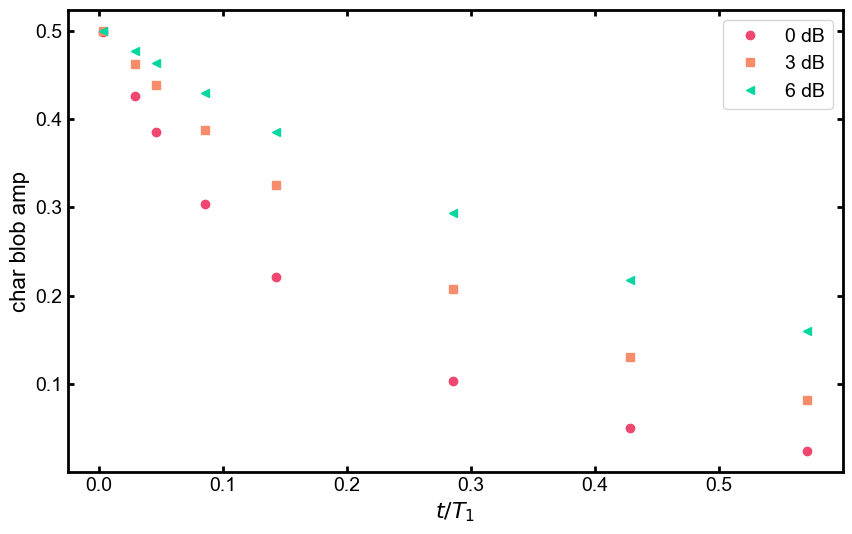

In [279]:
import matplotlib as mpl
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams["axes.linewidth"] = 2.0
mpl.rcParams['legend.frameon'] = True

mpl.rcParams['font.sans-serif'] ='Arial'
mpl.rcParams['axes.labelsize']= 8
mpl.rcParams['legend.fontsize'] = 14

fig, ax = plt.subplots(figsize = (10,6))

ax.tick_params(direction = "in", bottom=True, top=True, left=True, right=True, length=4, width=2, labelsize = 14)
#ax.grid();

#general_figure()plt.plot(transmis,negativity_loss[0], 'o', label = '0')
ax.plot(rel_t1,np.abs(negativity_loss[0]), 'o', color = '#ef476f', label = '0 dB')
ax.plot(rel_t1,np.abs(negativity_loss[1]), 's', color = '#f78c6b',label = '3 dB')
ax.plot(rel_t1,np.abs(negativity_loss[2]), '<', color = '#06d6a0',label = '6 dB')

# ax.plot(rel_t1,negativity_loss2[4], '--^', color = '#073b4c',label = '8 dB')
# ax.plot(rel_t1,negativity_loss2[5], '--v', color = '#118ab2',label = '10 dB')

ax.set_xlim()


#ax.set_title(f"cat- state with different degrees of squeezing different alpha, but same state overlap under loss", fontsize=18)
ax.set_xlabel(r"$t/T_1$", fontsize=16)
ax.set_ylabel("char blob amp", fontsize=16)

ax.legend()
plt.savefig("squeezed cat under photon loss.pdf", dpi=1200)

Text(0.5, 1.0, 'cats with different squeezing, T1 =350us')

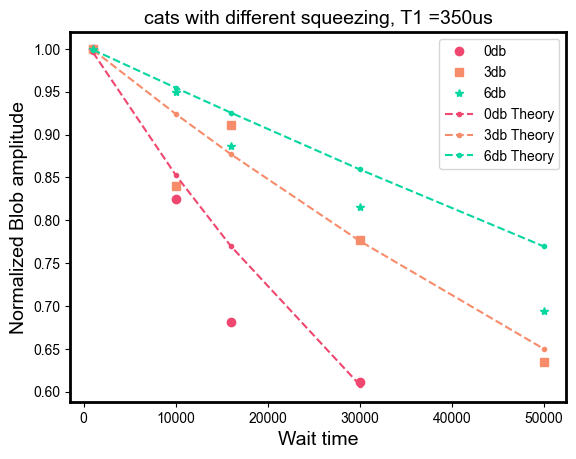

In [280]:
import matplotlib as mpl
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams["axes.linewidth"] = 2.0
mpl.rcParams['legend.frameon'] = True

mpl.rcParams['font.sans-serif'] ='Arial'
mpl.rcParams['axes.titlesize']= 14
mpl.rcParams['axes.labelsize']= 14
mpl.rcParams['legend.fontsize'] = 10


plt.plot(decay_times[:-4], amp_cat[:-2]/(np.max(amp_cat)),'o',color = '#ef476f',  label="0db")
plt.plot(decay_times[:-3], amp_cat_3db[:-3]/(np.max(amp_cat_3db)),'s', color = '#f78c6b', label="3db")
plt.plot(decay_times[:-3], amp_cat_6db[:-3]/(np.max(amp_cat_6db)), "*", color = '#06d6a0' ,  label="6db")

plt.plot(decay_times[:-4],2*np.abs(negativity_loss[0][:-4]),"--.", color = '#ef476f',  label="0db Theory")
plt.plot(decay_times[:-3],2*np.abs(negativity_loss[1][:-3]),'--.', color = '#f78c6b',  label="3db Theory")
plt.plot(decay_times[:-3],2*np.abs(negativity_loss[2][:-3]), "--.", color = '#06d6a0', label="6db Theory")

plt.legend()
plt.xlabel("Wait time")
plt.ylabel("Normalized Blob amplitude")
plt.title(f"cats with different squeezing, T1 ={t1}us")
